# Explore here

In [4]:
import pandas as pd

# Leer el archivo CSV directamente desde la URL
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(df.head())


     id                                              name  host_id    host_name neighbourhood_group neighbourhood  latitude  longitude        room_type  price  minimum_nights  number_of_reviews last_review  reviews_per_month  calculated_host_listings_count  availability_365
0  2539                Clean & quiet apt home by the park     2787         John            Brooklyn    Kensington     40.65     -73.97     Private room    149               1                  9  2018-10-19               0.21                               6               365
1  2595                             Skylit Midtown Castle     2845     Jennifer           Manhattan       Midtown     40.75     -73.98  Entire home/apt    225               1                 45  2019-05-21               0.38                               2               355
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth           Manhattan        Harlem     40.81     -73.94     Private room    150               3 

In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False) 

encoded_df = encoder.fit_transform(df[['neighbourhood_group']])

encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(['neighbourhood_group']))
df = df.join(encoded_df)

print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington     40.65     -73.97   
1     Jennifer           Manhattan       Midtown     40.75     -73.98   
2    Elisabeth           Manhattan        Harlem     40.81     -73.94   
3  LisaRoxanne            Brooklyn  Clinton Hill     40.69     -73.96   
4        Laura           Manhattan   East Harlem     40.80     -73.94   

         room_type  price  ...  number_of_reviews  last_review  \
0     Private room    149  ...                  9   2018-10-19   
1  Entir

In [5]:
df.shape


(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.drop(['name', 'host_id', 'host_name'], axis=1, inplace= True)

In [8]:
cont_unique = df.nunique()
cont_unique

id                                48895
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [11]:
np.where(df.price == 0)

(array([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259,
        26841, 26866]),)

In [12]:
df.drop([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26259, 26841, 26866], axis=0, inplace=True)

In [13]:
df.shape

(48884, 13)

In [14]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48884.00,48884.00,48884.00,48884.00,48884.00,48884.00,38833.00,48884.00,48884.00
mean,19016793.41,40.73,-73.95,152.76,7.03,23.27,1.37,7.14,112.78
std,10984315.04,0.05,0.05,240.17,20.51,44.55,1.68,32.96,131.63
min,2539.00,40.50,-74.24,10.00,1.00,0.00,0.01,1.00,0.00
25%,9470547.50,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19675740.50,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152966.75,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [15]:
y = df.price.values
y

array([149, 225, 150, ..., 115,  55,  90])

(array([4.7847e+04, 7.9900e+02, 9.9000e+01, 5.3000e+01, 2.0000e+01,
        2.1000e+01, 2.0000e+00, 1.1000e+01, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([   10. ,   509.5,  1009. ,  1508.5,  2008. ,  2507.5,  3007. ,
         3506.5,  4006. ,  4505.5,  5005. ,  5504.5,  6004. ,  6503.5,
         7003. ,  7502.5,  8002. ,  8501.5,  9001. ,  9500.5, 10000. ]),
 <BarContainer object of 20 artists>)

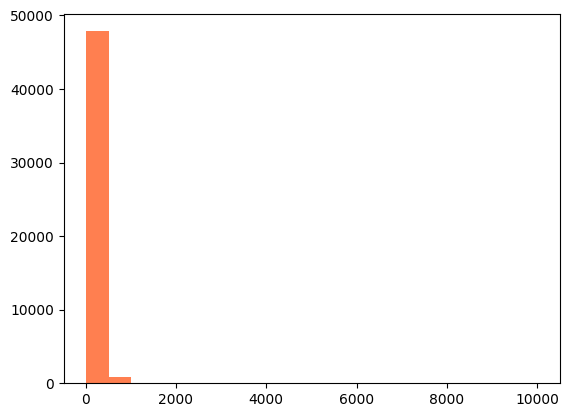

In [18]:
plt.hist(y, bins=20, color='coral')

{'whiskers': [<matplotlib.lines.Line2D at 0x70a6b2fdbe20>,
 'caps': [<matplotlib.lines.Line2D at 0x70a6b2fa4280>,
 'boxes': [<matplotlib.lines.Line2D at 0x70a6b2fdbb80>],
 'medians': [<matplotlib.lines.Line2D at 0x70a6b2fa47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x70a6b2fa4a60>],
 'means': []}

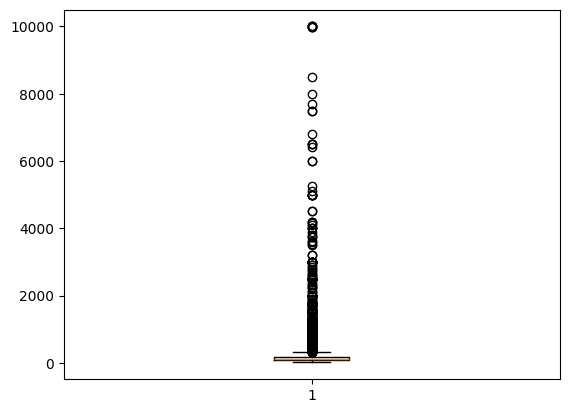

In [17]:
plt.boxplot(y)

In [19]:
df['LOG_PRICE'] = np.log(df.price)

[]

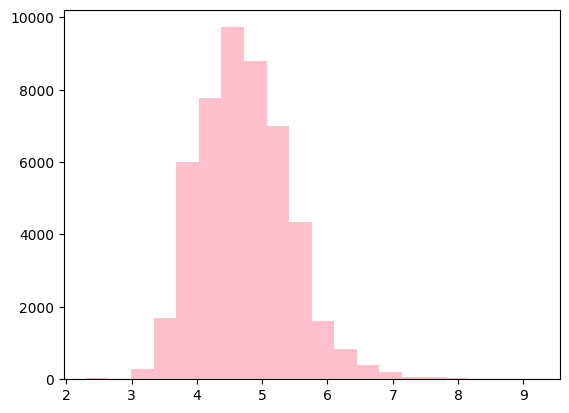

In [21]:
plt.hist(df['LOG_PRICE'], bins=20, color= 'pink')
plt.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x70a6b1d59330>,
 'caps': [<matplotlib.lines.Line2D at 0x70a6b1d59870>,
 'boxes': [<matplotlib.lines.Line2D at 0x70a6b1d59090>],
 'medians': [<matplotlib.lines.Line2D at 0x70a6b1d59db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x70a6b1d5a050>],
 'means': []}

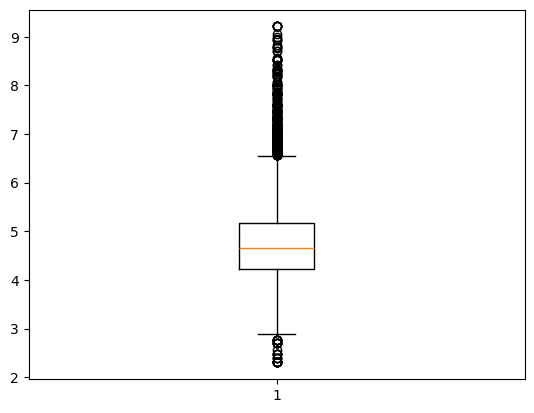

In [22]:
plt.boxplot(df.LOG_PRICE)

In [23]:
df.isna().mean()*100

id                                0.00
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
LOG_PRICE                         0.00
dtype: float64

In [24]:
df.isnull().any(axis=1).sum()/len(df)*100

np.float64(20.56091972833647)

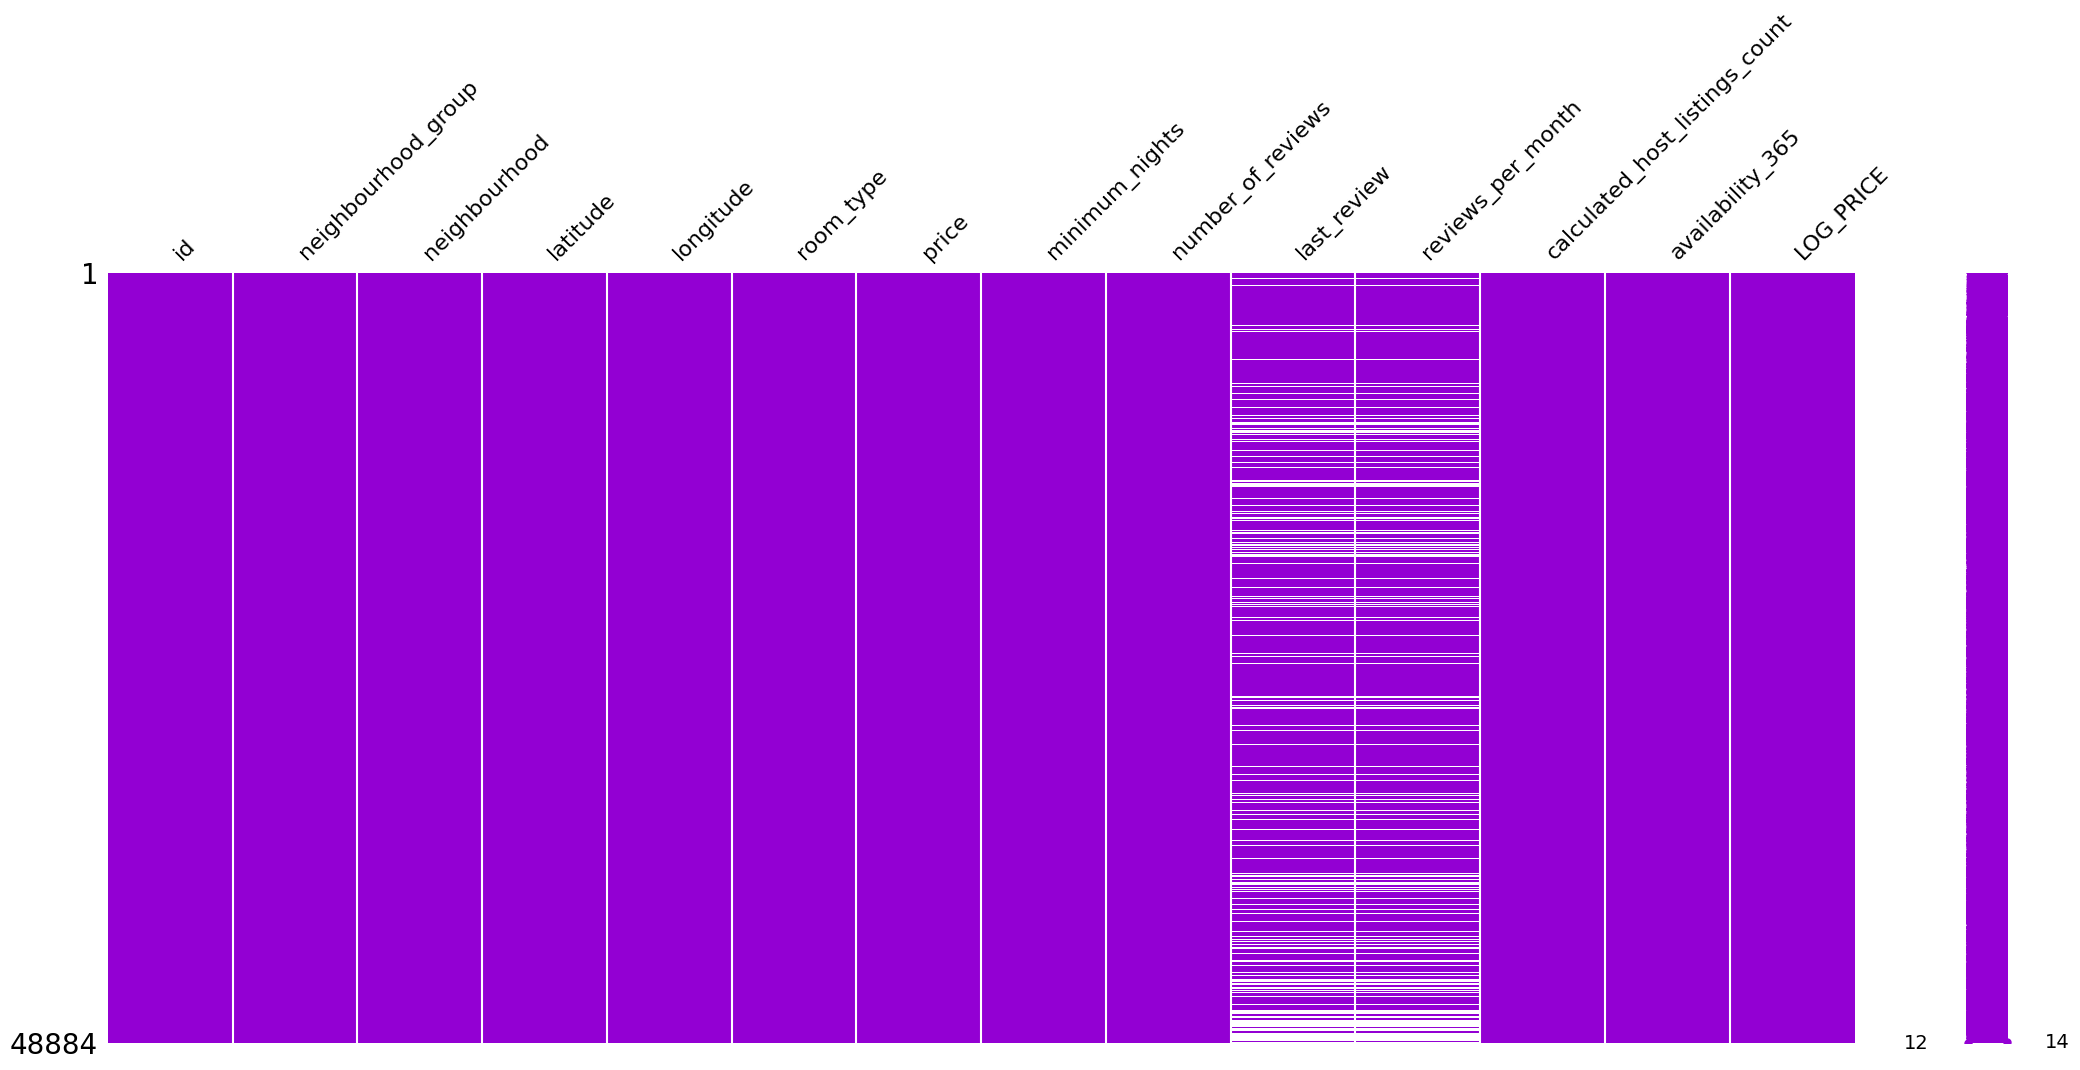

In [34]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df, color=(0.58, 0.0, 0.83))  

plt.show()


In [35]:
df[['last_review','reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,NaN,NaN
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,NaN,NaN
48891,NaN,NaN
48892,NaN,NaN
48893,NaN,NaN


In [36]:
df.reviews_per_month.fillna(0, inplace= True)

df[['last_review','reviews_per_month']]

,last_review,reviews_per_month
0,2018-10-19,0.21
1,2019-05-21,0.38
2,NaN,0.00
3,2019-07-05,4.64
4,2018-11-19,0.10
...,...,...
48890,NaN,0.00
48891,NaN,0.00
48892,NaN,0.00
48893,NaN,0.00


In [37]:
df.last_review.fillna(0, inplace= True)  
df.last_review

0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48884, dtype: object

In [38]:
df.last_review.fillna(0, inplace=True)

ls = []

for i in df.last_review:
    if i !=0:
        ls.append(1)
    else:
        ls.append(0)

df.last_review = ls

df.last_review

0        1
1        1
2        0
3        1
4        1
        ..
48890    0
48891    0
48892    0
48893    0
48894    0
Name: last_review, Length: 48884, dtype: int64

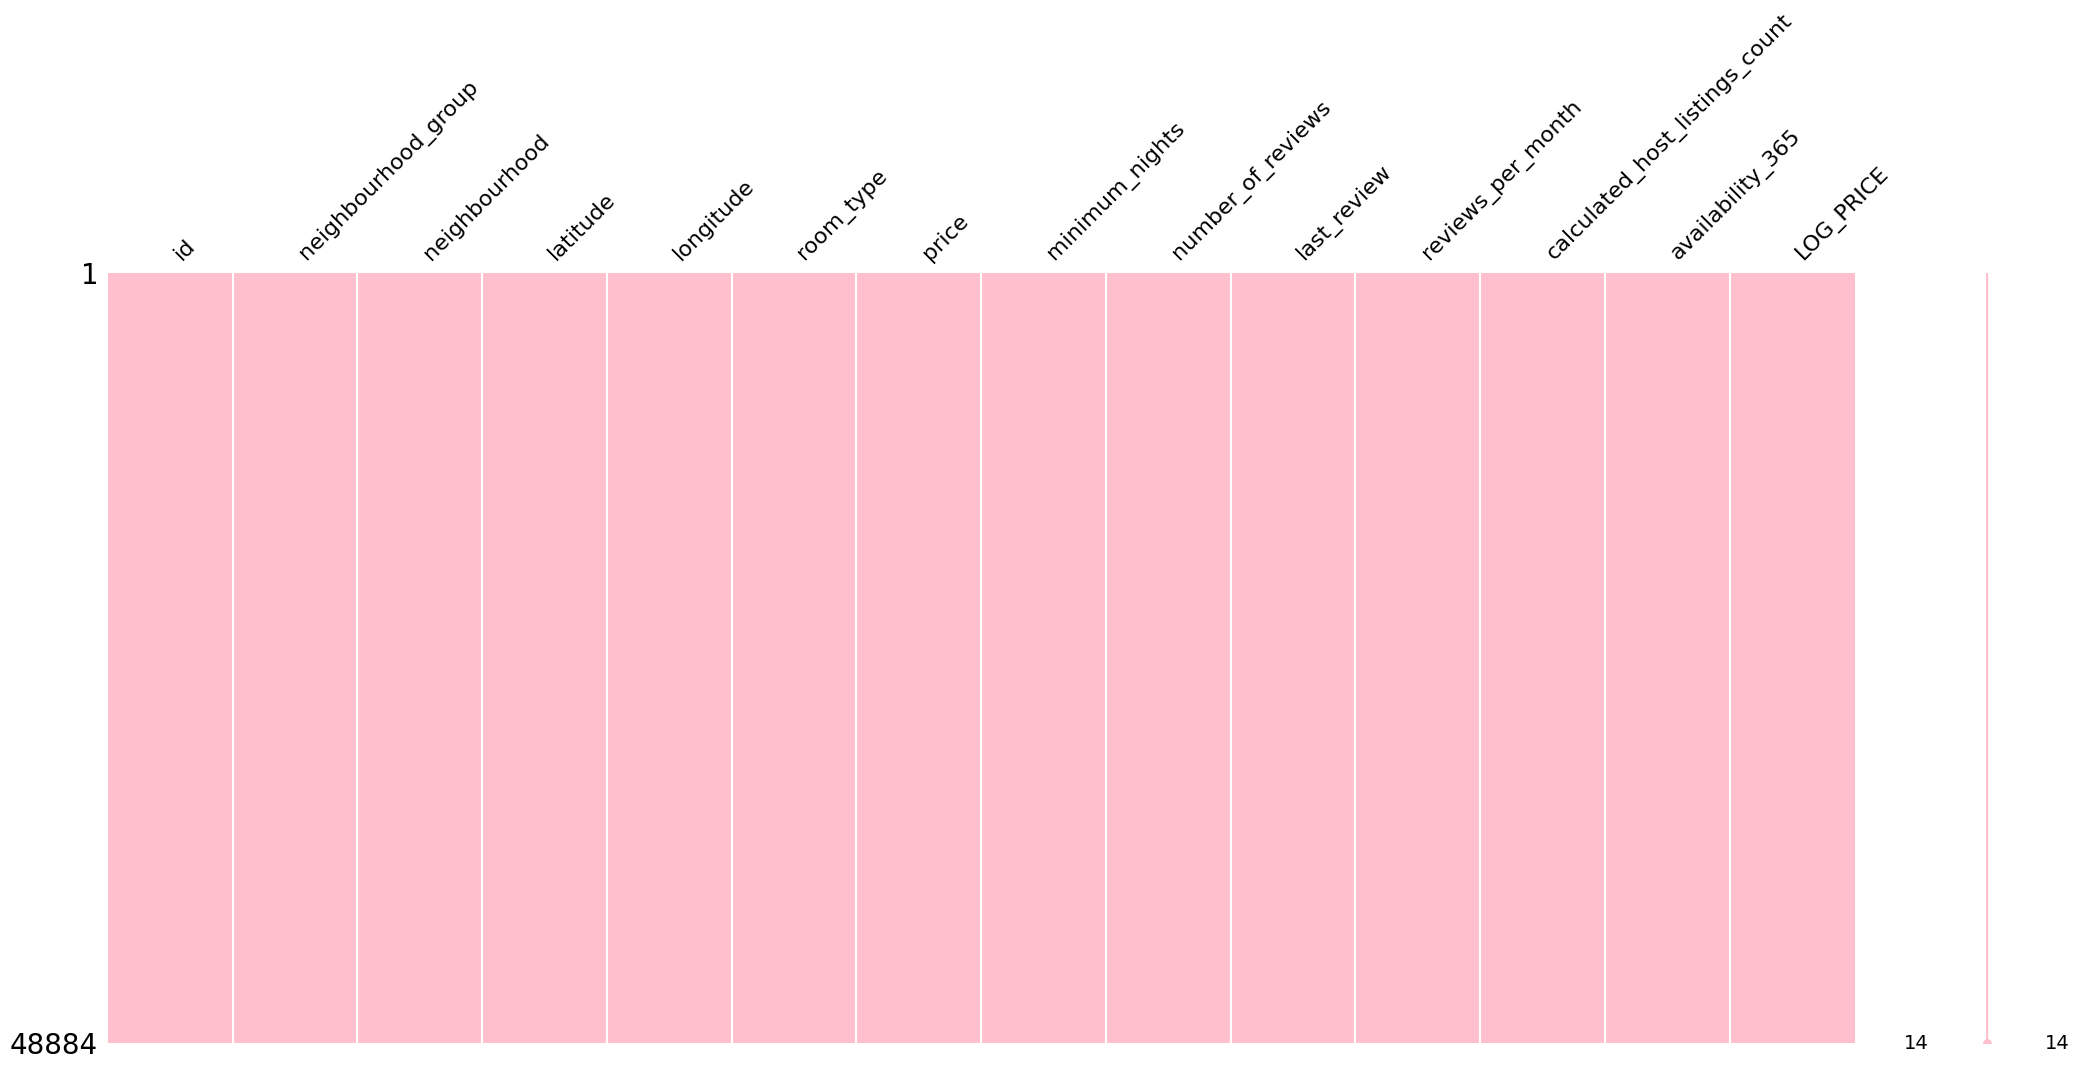

In [40]:
import missingno as msno
import matplotlib.pyplot as plt

# Cambiar el color del gráfico de matrix a rosado
msno.matrix(df, color=(1.0, 0.75, 0.8))  # Valores RGB para un color rosado

# Mostrar la gráfica
plt.show()


In [41]:
df.isna().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
LOG_PRICE                         0
dtype: int64

In [42]:
df = pd.get_dummies(df, drop_first=True)
X = df.drop(['price','LOG_PRICE'], axis=1)
y = df['LOG_PRICE']
X.dtypes

id                          int64
latitude                  float64
longitude                 float64
minimum_nights              int64
number_of_reviews           int64
                           ...   
neighbourhood_Woodlawn       bool
neighbourhood_Woodrow        bool
neighbourhood_Woodside       bool
room_type_Private room       bool
room_type_Shared room        bool
Length: 235, dtype: object